**Project:** Predicting car prices using K nearest neighbours algorithm based on \
1980's data \
**Data Source:** https://archive.ics.uci.edu/ml/datasets/automobile

**Variables:** 
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make (manufacturer brand): alfa-romero, audi, bmw, chevrolet, dodge, honda,
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from itertools import combinations
%matplotlib inline

In [2]:
# Parameters for project
rd_state = 1     # random seed number - used for results reproductibility

In [3]:
dataset_columns = ['symboling', 'normalized_losses', 'brand', 'fuel_type',
                   'aspirations', 'num_of_doors', 'body_style', 'drive_wheels',
                   'engine_location', 'wheel_base', 'length', 'width', 'height',
                   'curb_weight', 'engine_type', 'num_of_cylinders',
                   'engine_size', 'fuel_system', 'bore', 'stroke',
                   'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
                   'highway_mpg', 'price']
car_dataset = pd.read_csv('##\\GP22_PredictingCarPrices\\imports-85.data',
                          names = dataset_columns)

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   brand              205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspirations        205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
car_dataset.head()

,symboling,normalized_losses,brand,fuel_type,aspirations,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Target variable:** price  
**Variables to drop:** symboling, normalized_losses (actuarial variables)  
**Numeric explanatory variables:** wheel_base, engine_size, bore, stroke,  
compression_ratio, horsepowerk, peak_rpm, city_mpg, highway_mpg  
**Categoric explanatory variables:** brand, fuel_type, aspirations,  
num_of_doors, body_style, drive_wheels, engine_location, fuel_system  
  
For analytical purposes I will want to create dummy variables out of categorical  
ones to explore their predictive power.

# Phase 1 - data exploration and feature engineering (one-hot encoding)

In [6]:
#Dataset has missing values marked as "?". Replacing them to NaN and assigning proper variable types.
car_dataset.replace('?', np.nan, inplace=True)
car_dataset = car_dataset.convert_dtypes()
print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized_losses  164 non-null    string 
 2   brand              205 non-null    string 
 3   fuel_type          205 non-null    string 
 4   aspirations        205 non-null    string 
 5   num_of_doors       203 non-null    string 
 6   body_style         205 non-null    string 
 7   drive_wheels       205 non-null    string 
 8   engine_location    205 non-null    string 
 9   wheel_base         205 non-null    Float64
 10  length             205 non-null    Float64
 11  width              205 non-null    Float64
 12  height             205 non-null    Float64
 13  curb_weight        205 non-null    Int64  
 14  engine_type        205 non-null    string 
 15  num_of_cylinders   205 non-null    string 
 16  engine_size        205 non

In [7]:
# Deleting rows with missing values for 'price'
car_dataset.dropna(subset=['price'], inplace=True)
car_dataset.reset_index(inplace=True)
# Deleting actuarial variables 'symboling' and 'normalized_losses', which computation methodology
# we do not know (they are representing average damages for car type
# (normalized_losses)and indicating if car is overpriced/underpriced (symboling)), hence we
# would not be able to reproduce this variable for purpose of scoring new datasets
car_dataset.drop(['symboling', 'normalized_losses'], axis=1, inplace=True)

# 4/201 values remain missing for 'bore' and 'stroke' variables
# 2/201 for 'num_of_doors', 'horsepower', 'peak_rpm'

print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              201 non-null    int64  
 1   brand              201 non-null    string 
 2   fuel_type          201 non-null    string 
 3   aspirations        201 non-null    string 
 4   num_of_doors       199 non-null    string 
 5   body_style         201 non-null    string 
 6   drive_wheels       201 non-null    string 
 7   engine_location    201 non-null    string 
 8   wheel_base         201 non-null    Float64
 9   length             201 non-null    Float64
 10  width              201 non-null    Float64
 11  height             201 non-null    Float64
 12  curb_weight        201 non-null    Int64  
 13  engine_type        201 non-null    string 
 14  num_of_cylinders   201 non-null    string 
 15  engine_size        201 non-null    Int64  
 16  fuel_system        201 non

In [8]:
# Investigating remaining missing values (8 observations total)
cols_with_na = ['num_of_doors','bore','stroke','horsepower','peak_rpm']
print(car_dataset[cols_with_na][car_dataset['bore'].isna()])
print(car_dataset[cols_with_na][car_dataset['num_of_doors'].isna()])
print(car_dataset[cols_with_na][car_dataset['horsepower'].isna()])
# Little overlap between variables

   num_of_doors  bore stroke horsepower peak_rpm
52          two  <NA>   <NA>        101     6000
53          two  <NA>   <NA>        101     6000
54          two  <NA>   <NA>        101     6000
55          two  <NA>   <NA>        135     6000
   num_of_doors  bore stroke horsepower peak_rpm
26         <NA>  3.03   3.39        102     5500
60         <NA>  3.39   3.39         64     4650
    num_of_doors  bore stroke horsepower peak_rpm
126         four  3.46   3.90       <NA>     <NA>
127          two  3.46   3.90       <NA>     <NA>


In [9]:
# Setting pandas display to display all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
# 'Num_of_doors' 
# We can see that both dodge and mazda are sedan type - according to google typical sedan has 4 doors
print(car_dataset[car_dataset['num_of_doors'].isna()])
# In our dataset we can see that this is not always true
print(car_dataset[car_dataset['body_style']=='sedan']['num_of_doors'].value_counts())
# We can't really use average or mode to fill missing values and we can't define accurate number of doors based
# on presented data, hence best solution will be to drop this variable
car_dataset.drop(['num_of_doors'], axis=1, inplace=True)
cols_with_na.remove('num_of_doors')

    index  brand fuel_type aspirations num_of_doors body_style drive_wheels  \
26     27  dodge       gas       turbo         <NA>      sedan          fwd   
60     63  mazda    diesel         std         <NA>      sedan          fwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
26           front        93.7   157.3   63.8    50.6         2191   
60           front        98.8   177.8   66.5    55.5         2443   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
26         ohc             four           98        mpfi  3.03   3.39   
60         ohc             four          122         idi  3.39   3.39   

    compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
26                7.6        102     5500        24           30   8558  
60               22.7         64     4650        36           42  10795  
four    78
two     14
Name: num_of_doors, dtype: Int64


In [11]:
# 'bore' and 'stroke'
print(car_dataset[car_dataset['bore'].isna()])
# 3/4 observations are seemingly describing same mazda model, as their remanining variables (except price) have same values
# We will investigate if we can find similar observations in the dataset with 'bore' and 'stroke' values present

    index  brand fuel_type aspirations body_style drive_wheels  \
52     55  mazda       gas         std  hatchback          rwd   
53     56  mazda       gas         std  hatchback          rwd   
54     57  mazda       gas         std  hatchback          rwd   
55     58  mazda       gas         std  hatchback          rwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
52           front        95.3   169.0   65.7    49.6         2380   
53           front        95.3   169.0   65.7    49.6         2380   
54           front        95.3   169.0   65.7    49.6         2385   
55           front        95.3   169.0   65.7    49.6         2500   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
52       rotor              two           70        4bbl  <NA>   <NA>   
53       rotor              two           70        4bbl  <NA>   <NA>   
54       rotor              two           70        4bbl  <NA>   <NA>   
55       rotor            

In [12]:
# Trying to find observations with non-missing values
print(car_dataset[(car_dataset['brand'] == 'mazda') & (car_dataset['fuel_system'] == '4bbl')])
print(car_dataset[(car_dataset['brand'] == 'mazda') & (car_dataset['fuel_system'] == 'mpfi')]) 
# No such observations

    index  brand fuel_type aspirations body_style drive_wheels  \
52     55  mazda       gas         std  hatchback          rwd   
53     56  mazda       gas         std  hatchback          rwd   
54     57  mazda       gas         std  hatchback          rwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
52           front        95.3   169.0   65.7    49.6         2380   
53           front        95.3   169.0   65.7    49.6         2380   
54           front        95.3   169.0   65.7    49.6         2385   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
52       rotor              two           70        4bbl  <NA>   <NA>   
53       rotor              two           70        4bbl  <NA>   <NA>   
54       rotor              two           70        4bbl  <NA>   <NA>   

    compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
52                9.4        101     6000        17           23  10945  
53           

In [13]:
# Finding frequent values for mazda brand
print(car_dataset[(car_dataset['brand'] == 'mazda')]['bore'].value_counts())
print(car_dataset[(car_dataset['brand'] == 'mazda')]['stroke'].value_counts())
# No definitive way to fill NA values for 'bore' and 'stroke'.

3.39    6
3.03    4
3.08    1
3.76    1
3.43    1
Name: bore, dtype: Int64
3.39    6
3.15    5
3.16    1
3.64    1
Name: stroke, dtype: Int64


In [14]:
# Correcting data types
car_dataset['bore'] = pd.to_numeric(car_dataset['bore'], errors='coerce')
car_dataset['stroke'] = pd.to_numeric(car_dataset['stroke'], errors='coerce')
car_dataset['horsepower'] = pd.to_numeric(car_dataset['horsepower'], errors='coerce')
car_dataset['peak_rpm'] = pd.to_numeric(car_dataset['peak_rpm'], errors='coerce')
car_dataset['price'] = car_dataset['price'].astype(int)
print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              201 non-null    int64  
 1   brand              201 non-null    string 
 2   fuel_type          201 non-null    string 
 3   aspirations        201 non-null    string 
 4   body_style         201 non-null    string 
 5   drive_wheels       201 non-null    string 
 6   engine_location    201 non-null    string 
 7   wheel_base         201 non-null    Float64
 8   length             201 non-null    Float64
 9   width              201 non-null    Float64
 10  height             201 non-null    Float64
 11  curb_weight        201 non-null    Int64  
 12  engine_type        201 non-null    string 
 13  num_of_cylinders   201 non-null    string 
 14  engine_size        201 non-null    Int64  
 15  fuel_system        201 non-null    string 
 16  bore               197 non

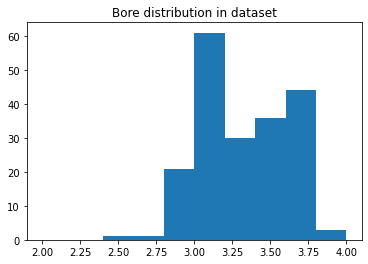

In [15]:
plt.hist(car_dataset[car_dataset['bore'] != np.nan]['bore'], range=(2,4))
plt.title('Bore distribution in dataset')
plt.show()

# Conclusion: based on the distribution of 'Bore' variable we will input average value for training dataset in place of missing values

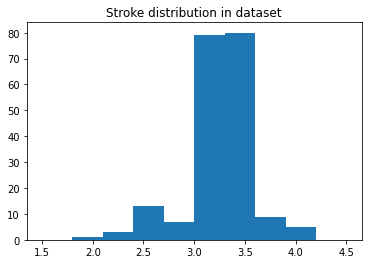

In [16]:
plt.hist(car_dataset[car_dataset['stroke'] != np.nan]['stroke'], range=(1.5,4.5))
plt.title('Stroke distribution in dataset')
plt.show()
# Conclusion: based on the distribution of 'Stroke' variable we will input average value for training dataset in place of missing values

In [17]:
# 'horsepower' and 'peak_rpm'
print(car_dataset[car_dataset['horsepower'].isna()])

     index    brand fuel_type aspirations body_style drive_wheels  \
126    130  renault       gas         std      wagon          fwd   
127    131  renault       gas         std  hatchback          fwd   

    engine_location  wheel_base  length  width  height  curb_weight  \
126           front        96.1   181.5   66.5    55.2         2579   
127           front        96.1   176.8   66.6    50.5         2460   

    engine_type num_of_cylinders  engine_size fuel_system  bore  stroke  \
126         ohc             four          132        mpfi  3.46     3.9   
127         ohc             four          132        mpfi  3.46     3.9   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  
126                8.7         NaN       NaN        23           31   9295  
127                8.7         NaN       NaN        23           31   9895  


In [18]:
# Trying to find observations with non-missing values
print(car_dataset[(car_dataset['brand'] == 'renault')])
# No definitive way to fill NA values for 'horsepower' and 'peak_rpm'.

     index    brand fuel_type aspirations body_style drive_wheels  \
126    130  renault       gas         std      wagon          fwd   
127    131  renault       gas         std  hatchback          fwd   

    engine_location  wheel_base  length  width  height  curb_weight  \
126           front        96.1   181.5   66.5    55.2         2579   
127           front        96.1   176.8   66.6    50.5         2460   

    engine_type num_of_cylinders  engine_size fuel_system  bore  stroke  \
126         ohc             four          132        mpfi  3.46     3.9   
127         ohc             four          132        mpfi  3.46     3.9   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  
126                8.7         NaN       NaN        23           31   9295  
127                8.7         NaN       NaN        23           31   9895  


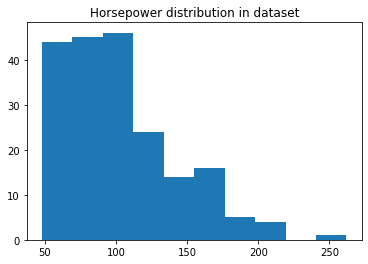

In [19]:
plt.hist(car_dataset[car_dataset['horsepower'] != np.nan]['horsepower'])
plt.title('Horsepower distribution in dataset')
plt.show()
# Conclusion: based on the distribution of 'Horsepower' variable we will input average value for training dataset in place of missing values

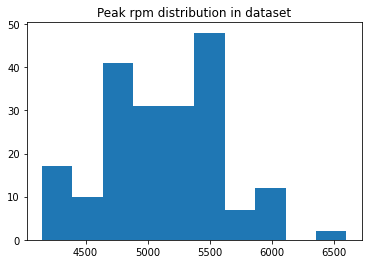

In [20]:
plt.hist(car_dataset[car_dataset['peak_rpm'] != np.nan]['peak_rpm'])
plt.title('Peak rpm distribution in dataset')
plt.show()
# Conclusion: based on the distribution of 'Peak_rpm' variable we will input average value for training dataset in place of missing values

In [21]:
car_dataset.head()

,index,brand,fuel_type,aspirations,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [22]:
# Deciding which variables to use for dummy variables creation
for name in car_dataset.select_dtypes(include='string').columns:
    print(name)
    print(car_dataset[name].value_counts())
    print('\n')

# brand - group 'isuzu', 'renault', 'mercury' into 'other'
# number of cylinders - group into "three or less", "seven or more"
# fuel_system - group '4bbl', 'spfi', 'mfi' into 'other'

brand
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: brand, dtype: Int64


fuel_type
gas       181
diesel     20
Name: fuel_type, dtype: Int64


aspirations
std      165
turbo     36
Name: aspirations, dtype: Int64


body_style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: Int64


drive_wheels
fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: Int64


engine_location
front    198
rear       3
Name: engine_location, dtype: Int64


engine_type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4

In [23]:
# Function grouping values from 'fuel_system', 'brand', 'num_of_cylinders' and 'engine_type' variables
# to more frequent groups 
def fother(var):
    if var in ['4bbl','spfi','mfi','isuzu','renault','mercury']:
        return 'other'
    elif var in ['two','three']:
        return 'three_or_less'
    elif var in ['eight','twelve']:
        return 'seven_or_more'
    else:
        return var

In [24]:
# Updating values
car_dataset['brand']=car_dataset['brand'].apply(fother)
car_dataset['fuel_system']=car_dataset['fuel_system'].apply(fother)
car_dataset['num_of_cylinders']=car_dataset['num_of_cylinders'].apply(fother)
car_dataset['engine_type']=car_dataset['engine_type'].apply(fother)

In [25]:
# After using apply affected variable types got changed to 'object'
# Swtiching them back to 'string'
car_dataset = car_dataset.convert_dtypes()
# car_dataset.info()

In [26]:
# Creating dummy variables based on categorical variables
# This is done to broaden variable base for KNN algorithm
car_dataset2=car_dataset
for name in car_dataset2.select_dtypes(include='string').columns:
    print(name)
    car_dataset2=pd.get_dummies(car_dataset2, prefix=name, prefix_sep='_', columns=[name])

brand
fuel_type
aspirations
body_style
drive_wheels
engine_location
engine_type
num_of_cylinders
fuel_system


In [27]:
# Converting some variables dtypes to float, as Float, Int32 and Int64 is not properly handled by KNN algorithm
# (Float and Int data types got created because of using .convert_dtypes() function)
Float_to_float = ['wheel_base', 'length', 'width', 'height', 'bore', 'stroke', 'compression_ratio', 'curb_weight', 'engine_size',
                 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
for var in Float_to_float:
    car_dataset2[var] = car_dataset2[var].astype(float)

In [28]:
# Checking variable types of our new dataset - now 66 variables
# All variables are numeric type, so we can use them in KNN algorithm
# Still there are missing values present in 'bore', 'stroke' (4) and 'horsepower', 'peak_rpm' (2)

car_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           201 non-null    Int64  
 1   wheel_base                      201 non-null    float64
 2   length                          201 non-null    float64
 3   width                           201 non-null    float64
 4   height                          201 non-null    float64
 5   curb_weight                     201 non-null    float64
 6   engine_size                     201 non-null    float64
 7   bore                            197 non-null    float64
 8   stroke                          197 non-null    float64
 9   compression_ratio               201 non-null    float64
 10  horsepower                      199 non-null    float64
 11  peak_rpm                        199 non-null    float64
 12  city_mpg                        201 

# Phase 2 - train/valid, test  split

In [29]:
# We have low number of observations (201)
# Arbitrarly deciding that we will use 20% holdout test dataset

# Preparing list of explanatory variables 
features = car_dataset2.columns.to_list()
features.remove('index')

X = car_dataset2.loc[:, features]
train, test = train_test_split(X, random_state= rd_state, train_size = .8)

In [30]:
print('train size: ' + str(train.shape[0]))
print('test size: ' + str(test.shape[0]))
# Sample sizes are correct

train size: 160
test size: 41


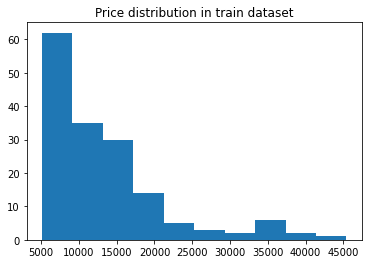

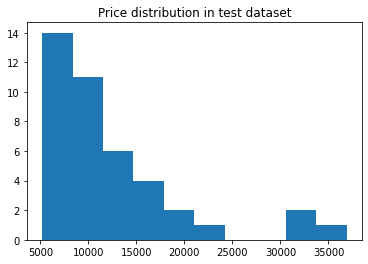

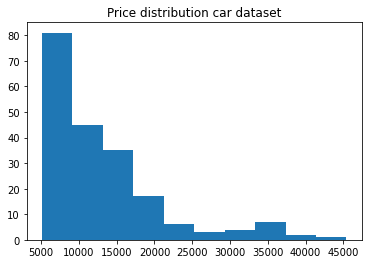

In [31]:
plt.hist(train['price'])
plt.title('Price distribution in train dataset')
plt.show()
plt.hist(test['price'])
plt.title('Price distribution in test dataset')
plt.show()
# Distribution plot of target variable 
plt.hist(car_dataset['price'])
plt.title('Price distribution car dataset')
plt.show()

In [32]:
train.isna().sum()
# All missing values are in the train dataset

wheel_base                        0
length                            0
width                             0
height                            0
curb_weight                       0
engine_size                       0
bore                              4
stroke                            4
compression_ratio                 0
horsepower                        2
peak_rpm                          2
city_mpg                          0
highway_mpg                       0
price                             0
brand_alfa-romero                 0
brand_audi                        0
brand_bmw                         0
brand_chevrolet                   0
brand_dodge                       0
brand_honda                       0
brand_jaguar                      0
brand_mazda                       0
brand_mercedes-benz               0
brand_mitsubishi                  0
brand_nissan                      0
brand_other                       0
brand_peugot                      0
brand_plymouth              

In [33]:
# Filling missing values with variable averages:
# We do this based on train data, not on test data to prevent information leakage about variable distribution to test dataset
for name in ["bore","stroke"]:
    train[name].fillna(train[name].mean(), inplace=True)

for name in ["horsepower","peak_rpm"]:
    train[name].fillna(round(train[name].mean()), inplace=True)
    

# Check
# train.isna().sum()
# No missing values left

# Phase 3 - feature selection

In [34]:
def knn_train_test(X, Y, DS, k, seed, train_pct = 0.8):
    """
    Generate multiple single-feature KNN regressions on given train dataset.
    
    Function will randomly split DS DataFrame into train/valid subsets and train multiple single-feature KNN models.
        

    Parameters
    ----------
    X : str
        List of features (independent variables).
    Y : str
        Dependent variable (explained).
    DS : pandas.DataFrame
        DataFrame containing X and Y variables.
    k : int
        Number of neighbors to use by default for kneighbors queries (KNeighborsRegressor n_neighbors parameter).
    seed : int
        Random number seed for results reproductibility.
    train_pct : float64, default 0.8
        Percentage of DS dataset to be used as train. 
        
    Returns
    -------
    predictions : numpy.ndarray
        Numpy array with the predicted resluts of target column.
    RMSE : float64
        Root mean squared error of predictions and Y variable on valid dataset.
    """
    model = KNeighborsRegressor(n_neighbors = k)
    ds_train, ds_valid = train_test_split(DS, random_state = seed, train_size = train_pct)
    model.fit(ds_train[[X]], ds_train[Y])
    predictions = model.predict(ds_valid[[X]])
    mse = mean_squared_error(ds_valid[Y].astype(float), predictions)
    rmse = np.sqrt(mse)
    return rmse, predictions

In [35]:
features.remove('price') # deleting dependent variable from list of variables

In [36]:
# Checking single-feature KNN model RMSE to find best predictors
# Because we are estimating single-feature only scaling is not required here
rmse_dict = dict()
n_neighbours = [1,2,3,5,7,9]

for var in features:
    values_dict = {}
    for n in n_neighbours:
        rmse, predictions = knn_train_test(X = var, Y = 'price', DS = train, k = n, seed = rd_state)
        values_dict[n] = rmse
    rmse_dict[var] = values_dict 

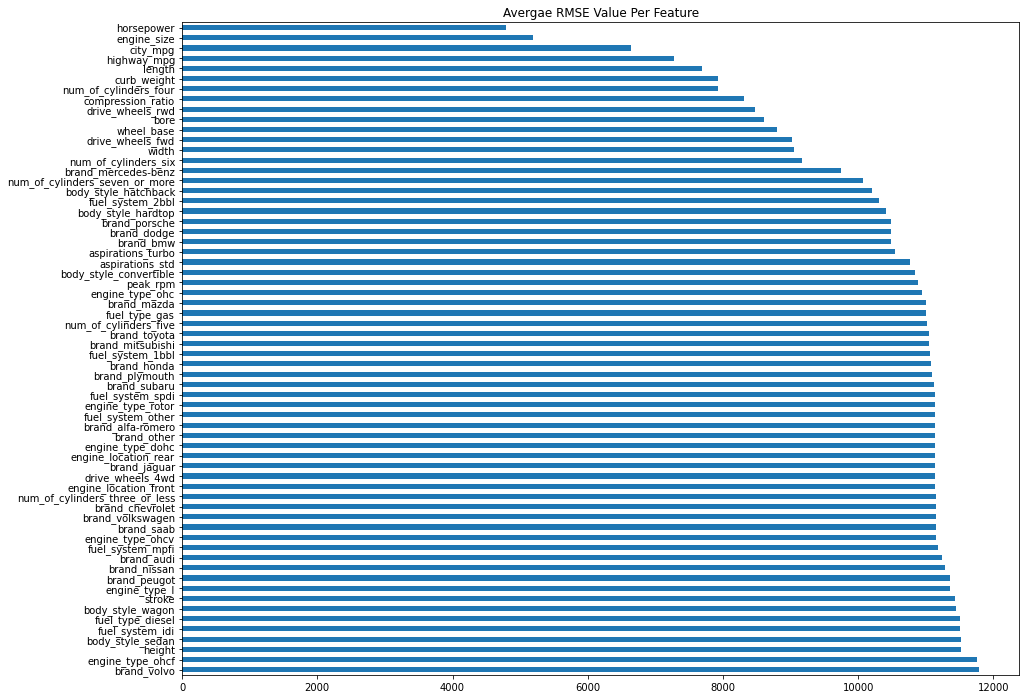

In [37]:
# Finding average RMSE for each feature from 6 KNN regressors
feature_avg_rmse = {}
for k,v in rmse_dict.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)

series_avg_rmse.sort_values(ascending = False).plot.barh(figsize=(15, 12))
plt.title('Avergae RMSE Value Per Feature')
plt.show()

Top 5 features for further analysis:
1) horsepower  
2) engine_size  
3) city_mpg  
4) highway_mpg (high correlation with city_mpg)  
5) length  

# Phase 4 - data normalization, model estimation

In [38]:
# Now we will re-train the model on full train dataset to find best multivariate suited model to test dataset

features_fin = ['horsepower','engine_size','city_mpg','highway_mpg','length','price']
train2=train[features_fin]
test2=test[features_fin]

# Normalizing train data based on train dataset descriptive statistics
normalized_train = (train2 - train2.min()) / (train2.max() - train2.min())
normalized_train['price']=train2['price']
normalized_train.head()

,horsepower,engine_size,city_mpg,highway_mpg,length,price
110,0.219626,0.222642,0.176471,0.216216,0.862687,16695
122,0.443925,0.339623,0.176471,0.297297,0.414925,22018
58,0.168224,0.230189,0.382353,0.432432,0.547761,10595
14,0.626168,0.558491,0.088235,0.162162,0.714925,30760
56,0.168224,0.230189,0.382353,0.432432,0.547761,8845


In [39]:
# Normalizing test data based on train dataset descriptive statistics
# This is to prevent information leakage (assumption that test data is "out of sample")
normalized_test=(test2-train2.min())/(train2.max() - train2.min())
normalized_test['price']=test2['price']
normalized_test.head()

,horsepower,engine_size,city_mpg,highway_mpg,length,price
97,0.228972,0.222642,0.411765,0.486486,0.482090,9549
117,0.093458,0.109434,0.529412,0.594595,0.241791,6229
59,0.168224,0.230189,0.382353,0.432432,0.547761,10245
35,0.130841,0.116981,0.500000,0.486486,0.238806,7295
165,0.317757,0.320755,0.323529,0.378378,0.523881,9989


In [40]:
normalized_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 110 to 37
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   horsepower   160 non-null    float64
 1   engine_size  160 non-null    float64
 2   city_mpg     160 non-null    float64
 3   highway_mpg  160 non-null    float64
 4   length       160 non-null    float64
 5   price        160 non-null    Int32  
dtypes: Int32(1), float64(5)
memory usage: 8.3 KB


In [41]:
# Possible combinations of 5 final features
list_combinations = [[]]
for n in range (1,6):
    list_combinations += list(combinations(normalized_train.columns.drop('price'), n))
print(len(list_combinations))
# Number of combinations - 32
print(list_combinations)

32
[[], ('horsepower',), ('engine_size',), ('city_mpg',), ('highway_mpg',), ('length',), ('horsepower', 'engine_size'), ('horsepower', 'city_mpg'), ('horsepower', 'highway_mpg'), ('horsepower', 'length'), ('engine_size', 'city_mpg'), ('engine_size', 'highway_mpg'), ('engine_size', 'length'), ('city_mpg', 'highway_mpg'), ('city_mpg', 'length'), ('highway_mpg', 'length'), ('horsepower', 'engine_size', 'city_mpg'), ('horsepower', 'engine_size', 'highway_mpg'), ('horsepower', 'engine_size', 'length'), ('horsepower', 'city_mpg', 'highway_mpg'), ('horsepower', 'city_mpg', 'length'), ('horsepower', 'highway_mpg', 'length'), ('engine_size', 'city_mpg', 'highway_mpg'), ('engine_size', 'city_mpg', 'length'), ('engine_size', 'highway_mpg', 'length'), ('city_mpg', 'highway_mpg', 'length'), ('horsepower', 'engine_size', 'city_mpg', 'highway_mpg'), ('horsepower', 'engine_size', 'city_mpg', 'length'), ('horsepower', 'engine_size', 'highway_mpg', 'length'), ('horsepower', 'city_mpg', 'highway_mpg', 'l

In [42]:
# Finding best combination of KNN algorithm
KNN_results = pd.DataFrame(columns=['algorithm','n_neighbours','predictors','mae','mape','rmse','r2'])
algorithms=['ball_tree', 'kd_tree', 'brute']
hyper_params=list(range(1,26))
for n in range(1,len(list_combinations)):
    for k in hyper_params:
        for a in algorithms:
            knn = KNeighborsRegressor(n_neighbors = k, algorithm = a, n_jobs=-1)
            knn.fit(normalized_train[list(list_combinations[n])], normalized_train['price'].astype(float))
            predictions=knn.predict(normalized_test[list(list_combinations[n])])
            mae = mean_absolute_error(predictions, normalized_test['price'].astype(float))
            mape = mean_absolute_percentage_error(predictions, normalized_test['price'].astype(float))
            mse=mean_squared_error(predictions,normalized_test['price'].astype(float))
            rmse=np.sqrt(mse)
            r2 = knn.score(normalized_test[list(list_combinations[n])], normalized_test['price'].astype(float))            
            df = pd.DataFrame([[a, k, str(list(list_combinations[n])), mae, mape, rmse, r2]], columns = ['algorithm','n_neighbours','predictors','mae','mape','rmse','r2'])
            KNN_results = pd.concat([KNN_results, df], ignore_index = True)

In [43]:
# Cleaning up "predictors" variable from object type (list) to string type
def list_to_str(list1):
    mystring=""
    for i in list1:
        mystring += i + ", " 
    return mystring.rstrip(", ")

KNN_results["predictors"] = KNN_results["predictors"].apply(eval)
KNN_results["predictors_str"] = KNN_results["predictors"].apply(list_to_str)
KNN_results.drop(columns = "predictors", inplace = True)

In [44]:
# Best models per n_neighbours class
KNN_results.loc[KNN_results.groupby('n_neighbours')['rmse'].idxmin()]

,algorithm,n_neighbours,mae,mape,rmse,r2,predictors_str
1950,ball_tree,1,1538.146341,0.122926,2248.391132,0.904610,"horsepower, engine_size, city_mpg, length"
1953,ball_tree,2,1436.182927,0.113492,2045.222030,0.921070,"horsepower, engine_size, city_mpg, length"
1132,kd_tree,3,1440.512195,0.114722,2160.316383,0.911937,"horsepower, engine_size, city_mpg"
1135,kd_tree,4,1597.335366,0.118807,2460.924004,0.885724,"horsepower, engine_size, city_mpg"
1138,kd_tree,5,1723.307317,0.131069,2560.586052,0.876281,"horsepower, engine_size, city_mpg"
1892,brute,6,1768.276423,0.138887,2686.857165,0.863778,"horsepower, engine_size, city_mpg, highway_mpg"
1744,kd_tree,7,2100.195122,0.146102,2837.456123,0.848079,"engine_size, highway_mpg, length"
1747,kd_tree,8,2000.759146,0.141080,2701.033240,0.862337,"engine_size, highway_mpg, length"
1075,kd_tree,9,1796.013550,0.132229,2777.143117,0.854469,"highway_mpg, length"
1077,ball_tree,10,1864.095122,0.133916,2836.179695,0.848216,"highway_mpg, length"


In [45]:
# 15 best models
# We see that 3 predictor sets dominated top 15 models
# 4 features: (horsepower, engine_size, city_mpg, length)
# 3 features: (horsepower, engine_size, city_mpg)
# 2 features: (engine_size, city_mpg)
KNN_results.sort_values(by=['rmse']).head(15)

,algorithm,n_neighbours,mae,mape,rmse,r2,predictors_str
1953,ball_tree,2,1436.182927,0.113492,2045.222030,0.921070,"horsepower, engine_size, city_mpg, length"
1954,kd_tree,2,1436.182927,0.113492,2045.222030,0.921070,"horsepower, engine_size, city_mpg, length"
1132,kd_tree,3,1440.512195,0.114722,2160.316383,0.911937,"horsepower, engine_size, city_mpg"
1131,ball_tree,3,1444.821138,0.115114,2173.721645,0.910841,"horsepower, engine_size, city_mpg"
1133,brute,3,1492.016260,0.119106,2182.952497,0.910082,"horsepower, engine_size, city_mpg"
1955,brute,2,1489.426829,0.113977,2183.447929,0.910041,"horsepower, engine_size, city_mpg, length"
1280,brute,2,1515.902439,0.113260,2234.513408,0.905784,"horsepower, engine_size, length"
1950,ball_tree,1,1538.146341,0.122926,2248.391132,0.904610,"horsepower, engine_size, city_mpg, length"
1951,kd_tree,1,1538.146341,0.122926,2248.391132,0.904610,"horsepower, engine_size, city_mpg, length"
1278,ball_tree,2,1532.439024,0.115533,2252.396948,0.904270,"horsepower, engine_size, length"


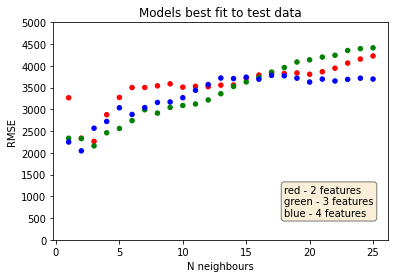

In [46]:
# Plotting best 3 models (feature-wise) to see how they are fitting to test data base on N neighbours parameter

# Selecting best 2,3,4 feature sets
top_pred=['engine_size, city_mpg','horsepower, engine_size, city_mpg', 'horsepower, engine_size, city_mpg, length']
features_rmse=KNN_results.loc[KNN_results['predictors_str'].isin(top_pred)]
features_rmse=features_rmse.loc[features_rmse.groupby(['predictors_str','n_neighbours'])['rmse'].idxmin()]

# Creating 'features' variable
features_rmse.loc[features_rmse['predictors_str'] =='engine_size, city_mpg', 'features'] = 2
features_rmse.loc[features_rmse['predictors_str'] =='horsepower, engine_size, city_mpg', 'features'] = 3
features_rmse.loc[features_rmse['predictors_str'] =='horsepower, engine_size, city_mpg, length', 'features'] = 4
features_rmse["features"] = features_rmse["features"].astype(int)

# Plotting RMSE
colors = {2:'red', 3:'green', 4:'blue', 5:'yellow'}
features_rmse.plot.scatter(x = 'n_neighbours', y = 'rmse', c=features_rmse['features'].map(colors))
plt.title('Models best fit to test data')
plt.xlabel('N neighbours')
plt.ylabel('RMSE')
plt.yticks(range(0,5500,500))
textstr = '\n'.join((
    "red - 2 features",
    "green - 3 features",
    "blue - 4 features"))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(18, 500, textstr, fontsize=10, horizontalalignment='left',
        verticalalignment='bottom', bbox=props)
plt.show()

In [47]:
features_rmse["n_neighbours"]=features_rmse["n_neighbours"].astype(int)
features_rmse[["n_neighbours","rmse"]].corr()

,n_neighbours,rmse
n_neighbours,1.000000,0.886306
rmse,0.886306,1.000000


We can see that 4 feature model is best fitted to test data for n neighbours values
of 2,3 and 16+ (compared to 2 and 3 features models for same n neighbours parameter
value). 3 features  model is dominant in <3;15> range of n neighbours parameter. 
Having said that, for 2 feature model for n neighbours = 3, we have 4th best model in
analyzed dataset. Overall we can observe a statistically significant positive correlation
between n neighbours parameter and RMSE, hence we recommend using low value of n neighbours.

(array([  3,  20,  40,  42,  50,  66,  80,  94, 105, 138, 150], dtype=int64),)
(array([22, 25, 39], dtype=int64),)


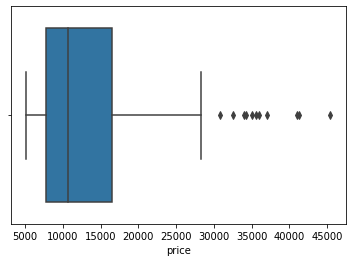

In [48]:
# Check for price outliers in train dataset - because of small dataset size we expect a significant amount of outliers
sn.boxplot(x = train['price'])
print(np.where(train['price']>30000)) # 11 outliers in train / 6,875% of dataset / 3 outliers above 40 000
print(np.where(test['price']>30000)) # 3 observations meeting same criteria in test dataset - 7,5% of dataset

In [49]:
# Checking if extreme values deletion from train dataset will improve overall performance

train3 = train2[train2.price < 45000] # Deleting 1 observation from train dataset with highest price

normalized_train_ex = (train3 - train3.min()) / (train3.max() - train3.min())
normalized_train_ex['price']=train3['price']

normalized_test_ex=(test2-train3.min())/(train3.max() - train3.min())
normalized_test_ex['price']=test2['price']

# Finding best combination of KNN algorithm
KNN_results_ex = pd.DataFrame(columns=['algorithm','n_neighbours','predictors','mae','mape','rmse','r2'])
algorithms=['ball_tree', 'kd_tree', 'brute']
hyper_params=list(range(1,26))
for n in range(1,len(list_combinations)):
    for k in hyper_params:
        for a in algorithms:
            knn = KNeighborsRegressor(n_neighbors = k, algorithm = a, n_jobs=-1)
            knn.fit(normalized_train_ex[list(list_combinations[n])], normalized_train_ex['price'].astype(float))
            predictions=knn.predict(normalized_test_ex[list(list_combinations[n])])
            mae = mean_absolute_error(predictions, normalized_test_ex['price'].astype(float))
            mape = mean_absolute_percentage_error(predictions, normalized_test['price'].astype(float))
            mse=mean_squared_error(predictions,normalized_test_ex['price'].astype(float))
            rmse=np.sqrt(mse)
            r2 = knn.score(normalized_test_ex[list(list_combinations[n])], normalized_test_ex['price'].astype(float)) 
            
            df = pd.DataFrame([[a, k, list_combinations[n], mae, mape, rmse, r2]], columns = ['algorithm','n_neighbours','predictors','mae','mape','rmse','r2'])
            KNN_results_ex = pd.concat([KNN_results_ex, df], ignore_index = True)



In [50]:
# Best models after deleting 1 observation with highest price in train dataset
KNN_results_ex.sort_values(by=['rmse']).head(3)

# Deleting extreme observation decreases prediction power by at least 1% (looking at R^2 metric)

,algorithm,n_neighbours,predictors,mae,mape,rmse,r2
1131,ball_tree,3,"(horsepower, engine_size, city_mpg)",1471.243902,0.118446,2164.652306,0.911583
1132,kd_tree,3,"(horsepower, engine_size, city_mpg)",1475.552846,0.118837,2178.030882,0.910487
1133,brute,3,"(horsepower, engine_size, city_mpg)",1492.016260,0.119106,2182.952497,0.910082


# Conclusion

Using KNN algorithm we were able to estimate pretty good model predicting car prices from 1980's (dataset : https://archive.ics.uci.edu/ml/datasets/automobile ). Best model used 4 features and 2 nearest neighbours with evaluation metrics on holdout dataset : MAPE 11,8%, RMSE 2 164,65 and R^2 91,16%. Because of small data size (205 observations total) further improvement using same ML technique will be limited, even considering cross-validation techniques. As further steps we could compare KNN performance vs other algorithms (for example logistic regression and tree-based techniques).
